# Aim

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from 
Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

Data cleaning

In [1]:
# Import Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df=pd.read_csv('titanic.csv')

In [3]:
# Understanding Dataset
print("Dataset Preview is : \n", df.head())
print("\n\nInformation of dataset is : ")
print(df.info())
print("\n\nDescribing dataset : \n",df.describe())

Dataset Preview is : 
    PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


Information of dataset is : 
<class 'pandas.core.frame.DataFr

In [4]:
# Handling null values

print("Number of null values present in each column is : \n",df.isnull().sum())
print("Preview of columns containing null values is : \n",df[['Age', 'Cabin' , 'Fare']])

'''Filling null values'''
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna( 'None', inplace=True)
df['Fare'].fillna( df['Fare'].mean(), inplace=True)

Number of null values present in each column is : 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Preview of columns containing null values is : 
       Age Cabin      Fare
0    34.5   NaN    7.8292
1    47.0   NaN    7.0000
2    62.0   NaN    9.6875
3    27.0   NaN    8.6625
4    22.0   NaN   12.2875
..    ...   ...       ...
413   NaN   NaN    8.0500
414  39.0  C105  108.9000
415  38.5   NaN    7.2500
416   NaN   NaN    8.0500
417   NaN   NaN   22.3583

[418 rows x 3 columns]


In [5]:
print("Data after handling null values is : \n",df[['Age', 'Cabin' , 'Fare']])

Data after handling null values is : 
           Age Cabin      Fare
0    34.50000  None    7.8292
1    47.00000  None    7.0000
2    62.00000  None    9.6875
3    27.00000  None    8.6625
4    22.00000  None   12.2875
..        ...   ...       ...
413  30.27259  None    8.0500
414  39.00000  C105  108.9000
415  38.50000  None    7.2500
416  30.27259  None    8.0500
417  30.27259  None   22.3583

[418 rows x 3 columns]


In [6]:
# Handling duplicated rows

print("Number of duplicated rows is : ",df.duplicated().sum())

Number of duplicated rows is :  0


Exploratory Data Analysis (EDA)

In [7]:
# Describe data insights
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292  None        Q  
1   363272   7.0000  None        S  
2   240276   9.6875  None        Q  
3   315154   8.6625  None        S  
4  3101298  12.2875  None        S  


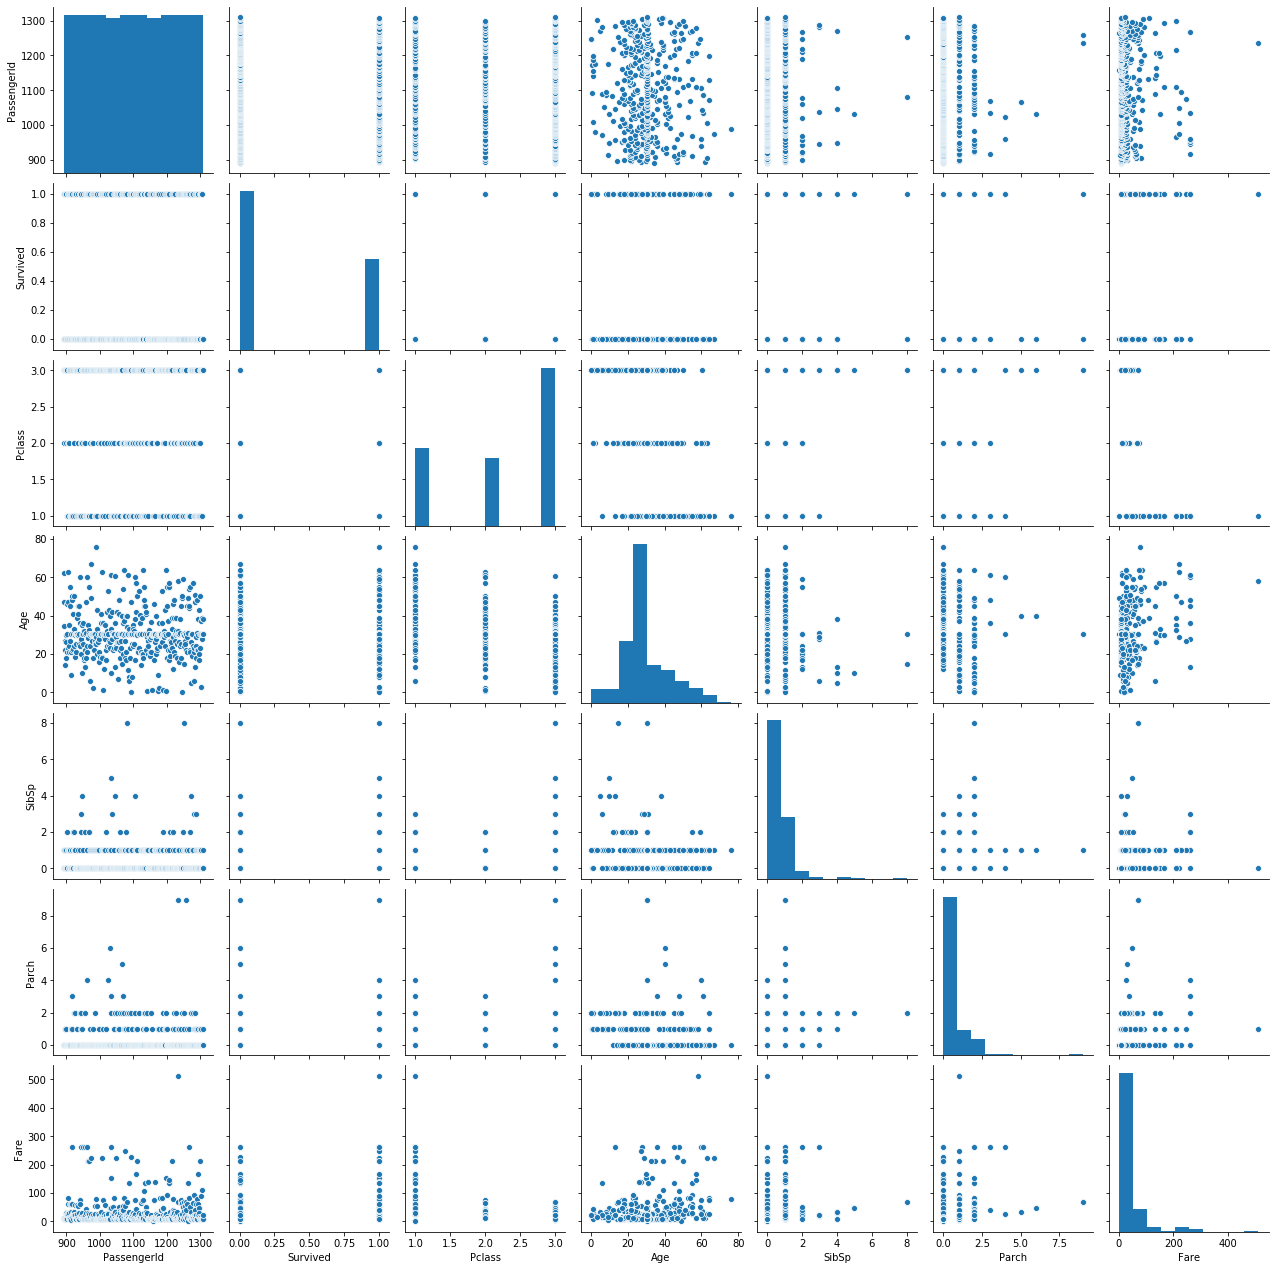

In [8]:
# Correlation Analysis

sns.pairplot(df)
plt.show()

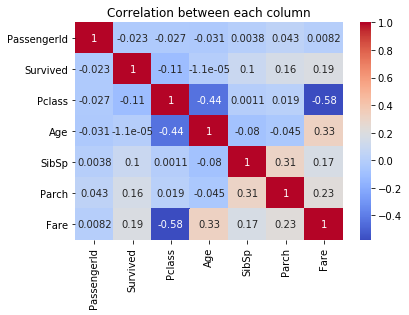

In [9]:
# Correlation between each column

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between each column")
plt.show()

Number of passenger survived are :  152

Total survival : 
 Sex
female    152
male        0
Name: Survived, dtype: int64


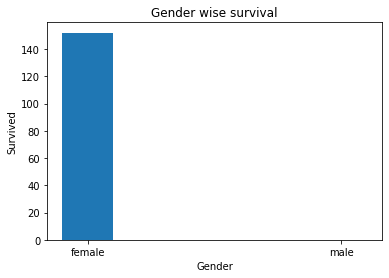

In [10]:
# Categorical Correlation

print("Number of passenger survived are : ",df['Survived'].sum())

total_survival = df.groupby('Sex')['Survived'].sum()
x = np.arange(len(total_survival))
plt.bar(x , total_survival , .2)
plt.title('Gender wise survival')
plt.xlabel('Gender')
plt.ylabel('Survived')
plt.xticks(x, total_survival.index)  # Set x-axis labels to categories

print("\nTotal survival : \n",total_survival)

plt.show()

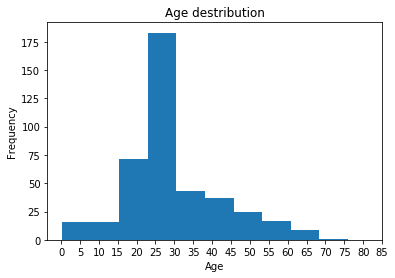

In [11]:
# Ages of passengers 

plt.hist(df['Age'], bins=10)
plt.title('Age destribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(0,90,5))
plt.show()

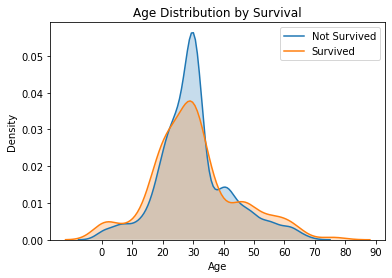

In [12]:
# Age wise survival

sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Not Survived', shade=True)
sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived', shade=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.xticks(range(0,100,10))
plt.legend(loc='upper right', ncol=1)
plt.show()


Pclass
1    50
2    30
3    72
Name: Survived, dtype: int64


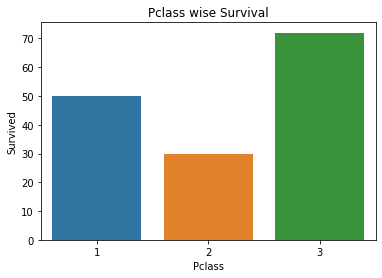

In [13]:
# Pclass wise Survival

count=df.groupby('Pclass')['Survived'].sum()
print(count)

sns.barplot(data=df, x=[1,2,3], y=[50,30,72])
plt.title('Pclass wise Survival')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.show()

SUMMARY

Pairplot :
1. Age-Passengerid --> Maximum passanger were young(age~30) 
2. Fare-Passengerid --> Maximum passanger were not fare 
3. Fare-Age --> Irrespective of age most of the passenger were not fare


Heatmap : 
1. Pclass and Fare --> strong negative correlation
2. Pclass and Age --> weak negative correlation

Bar Chart : 
1. Only female passengers survived
2. 3rd Pclass has maximum survival rate

Histogram : 
1. Most of the passengers on titanic were of age group 20-30

KDE Plot (Density Plot) : 
1. It indicates higher survival rate for younger passengers (i.e. women and children)